## Vertical Profiles of Temperature, Salinity, and Velocity

This script creates the vertical profile figures in the main and appended text. You will need to download'revised_stat' folder to run this script. All code is written by Madie Mamer (mmamer3@gatech.edu)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cmo
import math
from scipy.ndimage import uniform_filter1d
from labellines import labelLine, labelLines #https://pypi.org/project/matplotlib-label-lines/

## Reading in the time-averaged domain files from 'revised_stat'

In [2]:
path = 'revised_stat'

F1cu2_body = pd.read_csv(path + '/f1cu2_avg_body.csv')
F1cu2_bf_body = pd.read_csv(path + '/f1cu2_bf_avg_body.csv')

F2cu2_body = pd.read_csv(path + '/f2cu2_avg_body.csv')
F2cu2_bf_body = pd.read_csv(path + '/f2cu2_bf_avg_body.csv')

F3cu2_body = pd.read_csv(path + '/f3cu2_avg_body.csv')
F3cu2_bf_body = pd.read_csv(path + '/f3cu2_bf_avg_body.csv')

F4cu2_body = pd.read_csv(path + '/f4cu2_avg_body.csv')
F4cu2_bf_body = pd.read_csv(path + '/f4cu2_bf_avg_body.csv')

F5cu2_body = pd.read_csv(path + '/f5cu2_avg_body.csv')
F5cu2_bf_body = pd.read_csv(path + '/f5cu2_bf_avg_body.csv')

## Function: meltSensitivity

Below is a function that loops through the given file (body_data) to find data points that meet the given condition of being at a given location (locations). Once those data points are found, the function then loops through each data point to calculate the shear velocity (uShear), ice distance, (dist), turbulent transfer coefficient (gammaT, gammaS), and melt rate (mT). It combines all of these values into a matrix 'retArr' which can be indexed by retArr[var,:,location] where var is the interested variable, and location is the given location. You must pass an rOff for how large of a nearby grouping you want to your given location (i.e. its a rounding value).

In [4]:
def meltSensitivity( body_data, locations, rOff):
    retArr = np.zeros((6, 6000,len(locations))) * np.nan ##y, u, temp, salt

    for j in range(0,len(locations)):
        new = body_data.iloc[np.where(body_data['x'].round(rOff) == locations[j])]
        u = np.array(new['avg_xVel'][::-1])
        salt =  np.array(new['avgSalt'][::-1])
        temp =  np.array(new['avgTemp'][::-1])
        rho =  np.array(new['avgDense'][::-1])
        y =  np.array(new['y'][::-1])
        nu = 1.95 * 10 **(-6)
        u_wall = 0#abs(u[0])
        salt_wall = salt[0]
        temp_wall = temp[0]
        rho_wall = rho[0]
        y_wall = y[0]
        Pr = 13.8
        Sc = 2432
        cp = 2009
        L_i = 334000
        rho_i = 918
        melt_temp = np.zeros(len(y))
        melt_salt = np.zeros(len(y))
        gamma_temp = np.zeros(len(y))
        gamma_salt = np.zeros(len(y))
        ushear_arr = np.zeros(len(y))
        nSquared = np.zeros(len(y))
        for i in range(0,len(y)):
            uShear = np.sqrt(nu * (abs(u[i]) - u_wall) / abs(y[i] - y_wall))
            dist = y_wall - y[i]
            gammaT = uShear / (2.12 * np.log(uShear * dist / nu) + 12.5 \
                               * Pr**(2/3) - 9)
            gammaS = uShear / (2.12 * np.log(uShear * dist / nu) + 12.5 \
                               * Sc**(2/3) - 9)
            mT = rho[i] * cp * gammaT * (temp[i] - temp_wall) / (L_i * rho_i)
            mS = rho[i] * gammaS * (salt[i] - salt_wall) / (salt_wall * rho_i)
            melt_temp[i] = mT
            melt_salt[i] = mS
            ushear_arr[i] = uShear
            gamma_temp[i] = gammaT
            gamma_salt[i] = gammaS
            ##N2
        for i in range(0,len(y)-1):
            nSquared[i] = (-9.81 / 1000) * (rho[i] - rho[i+1]) / (y[i]-y[i+1])
        num = len(y)
        retArr[0,0:num,j] = y
        retArr[1,0:num,j] = u
        retArr[2,0:num,j] = temp
        retArr[3,0:num,j] = salt 
        retArr[4,0:num,j] = ushear_arr
        retArr[5,0:num,j] = nSquared
    return retArr#, rho, nSquared, melt_temp, melt_salt, ushear_arr, gamma_temp, gamma_salt,

In [5]:
locs_f2 = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0]
noMelt_f2 = meltSensitivity(F2cu2_body,locs_f2,2)
meltEnabled_f2 = meltSensitivity(F2cu2_bf_body,locs_f2,2)

/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:29: RuntimeWarning: invalid value encountered in scalar divide
  uShear = np.sqrt(nu * (abs(u[i]) - u_wall) / abs(y[i] - y_wall))
/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:31: RuntimeWarning: divide by zero encountered in log
  gammaT = uShear / (2.12 * np.log(uShear * dist / nu) + 12.5 \
/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:33: RuntimeWarning: divide by zero encountered in log
  gammaS = uShear / (2.12 * np.log(uShear * dist / nu) + 12.5 \
/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  nSquared[i] = (-9.81 / 1000) * (rho[i] - rho[i+1]) / (y[i]-y[i+1])
/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  uShear = np.sqrt(nu * (abs(u[i]) - u_wall) / 

## Plotting the vertical profiles for $u_f = 0.5 [cm/s]$ non-melt enabled (A-C) and melt enabled (D-F)

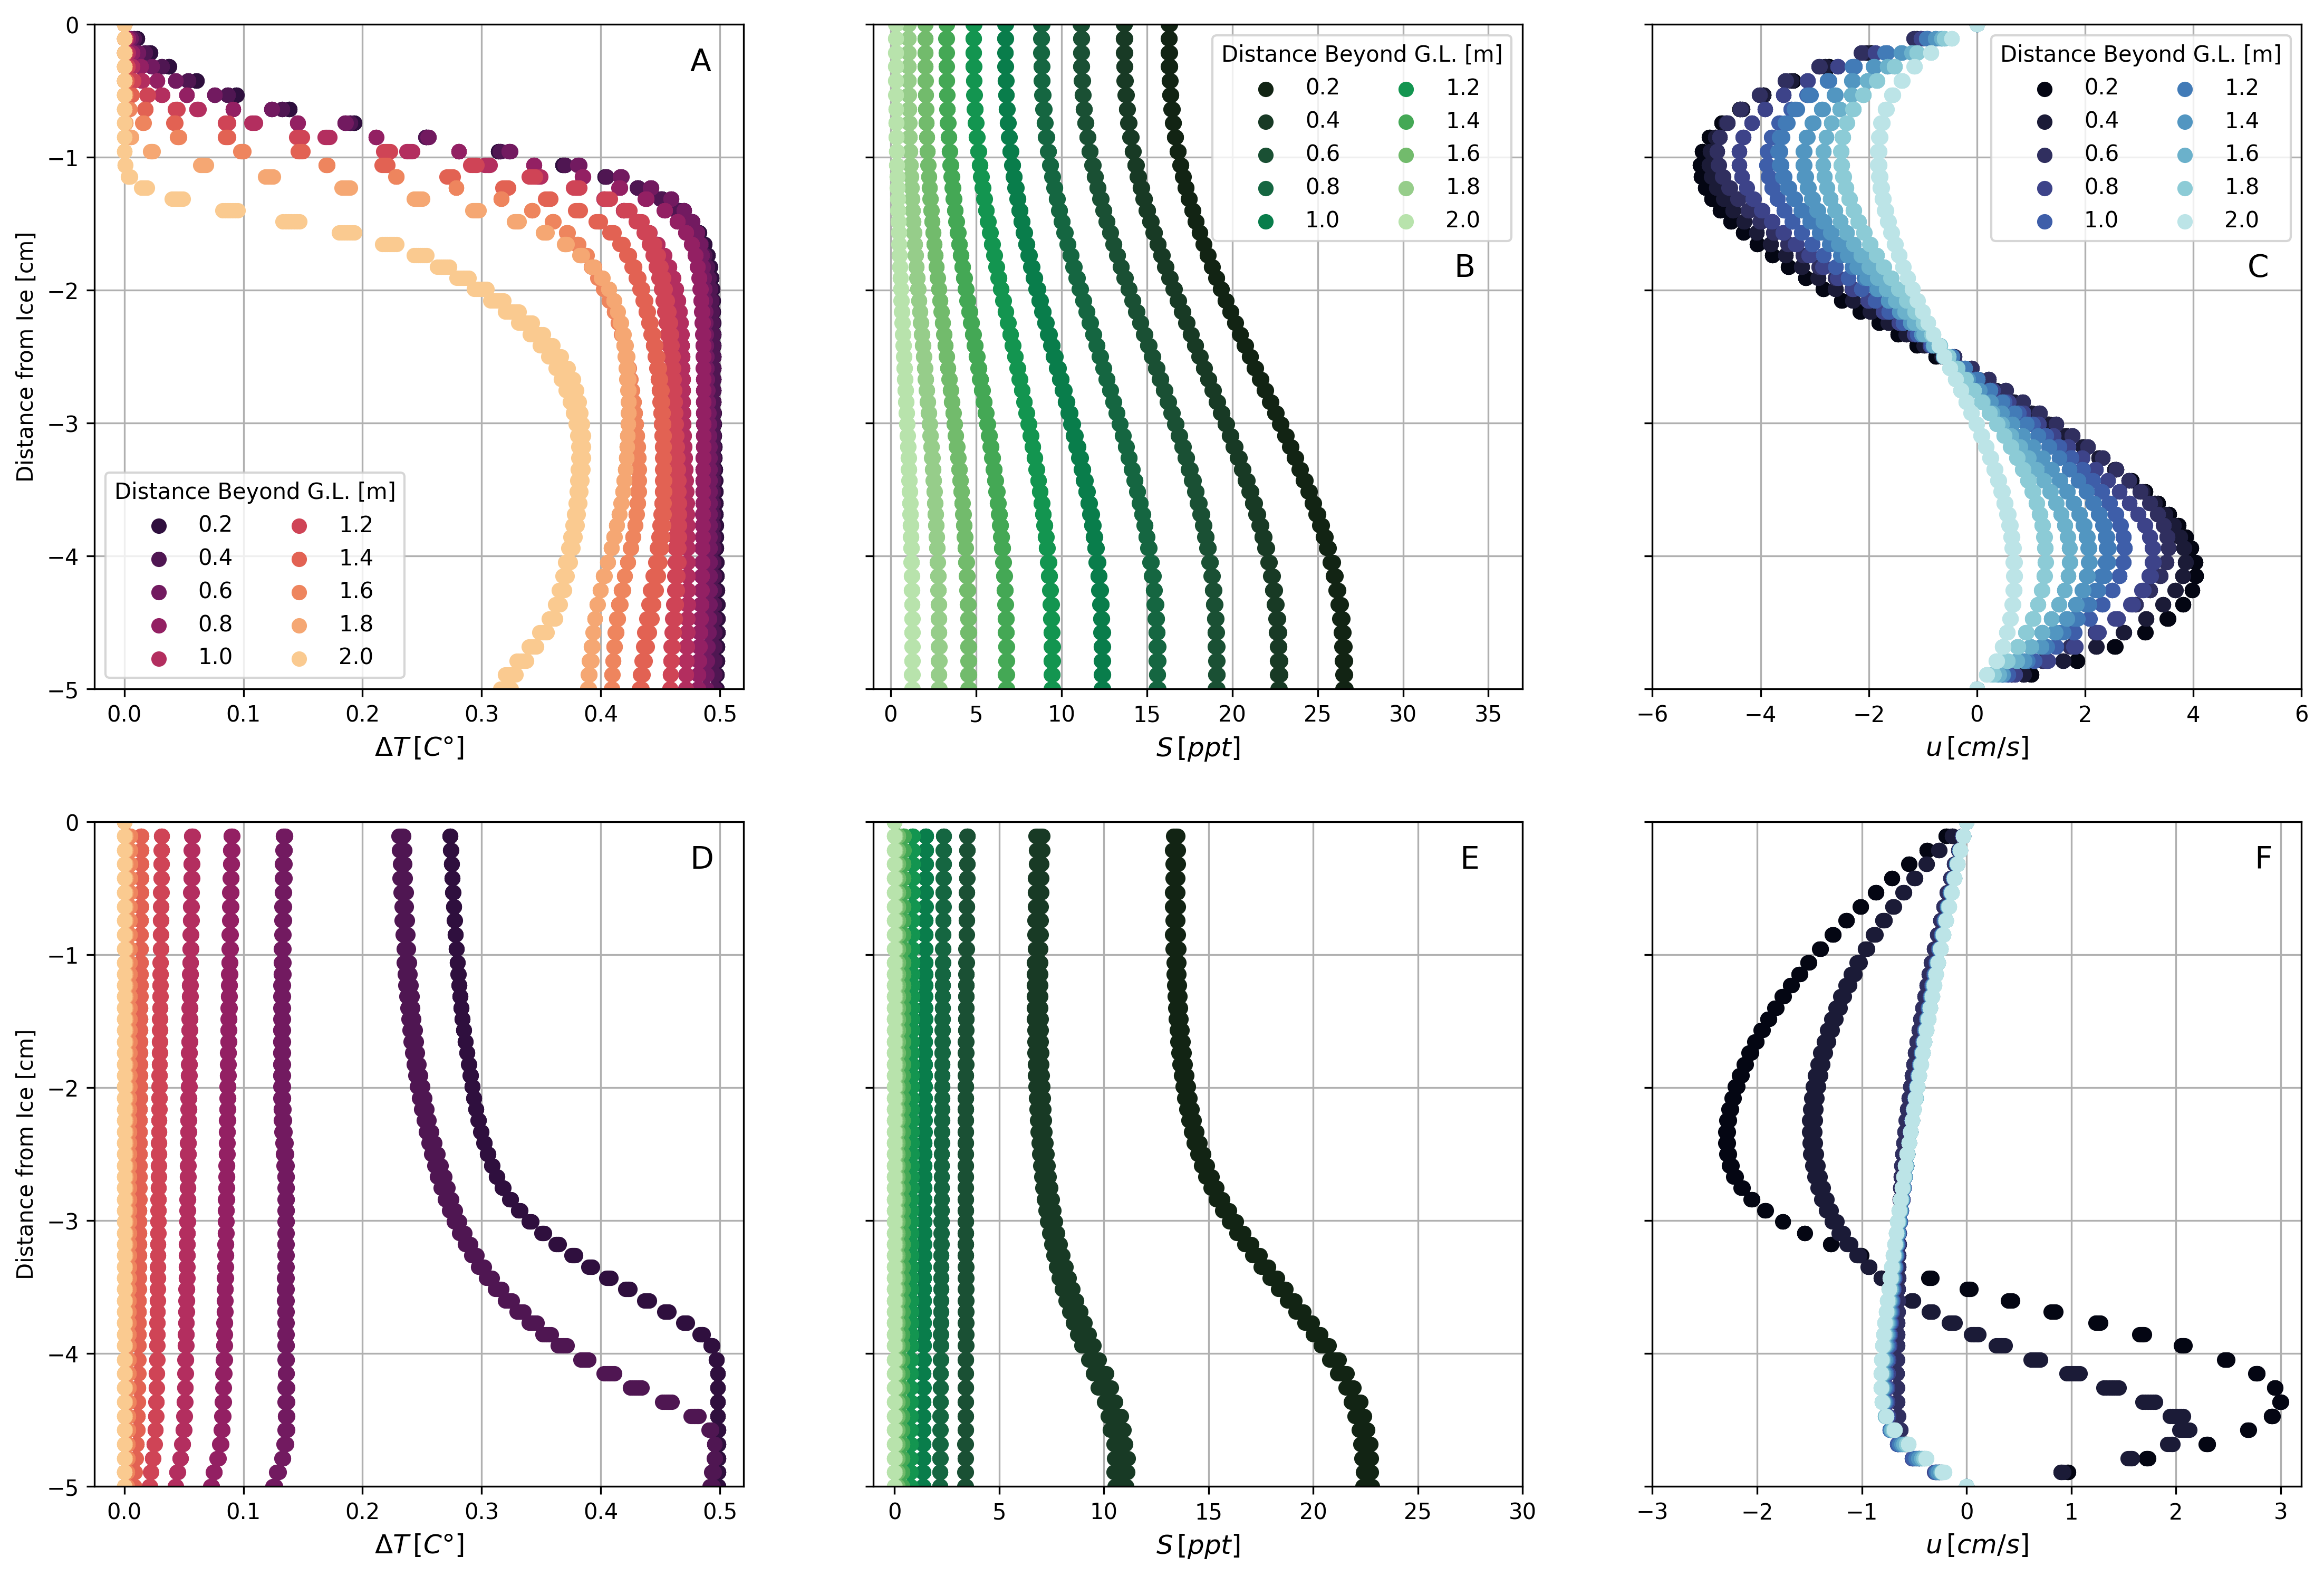

In [6]:
fig, ax = plt.subplots(2,3, figsize = (18,12), dpi = 300)


ys = noMelt_f2[0,:,:]
n = len(ys[0,:])
cT = cmo.cm.matter_r(np.linspace(0,1,n+1))
cS = cmo.cm.algae_r(np.linspace(0,1,n+1))
cU = cmo.cm.ice(np.linspace(0,1,n+1))

## non-melting plotting
Ts = noMelt_f2[2,:,:]
Ss = noMelt_f2[3,:,:]
us = noMelt_f2[1,:,:]
nsq = noMelt_f2[4,:,:]
for i in range(0,n):
    ax[0,0].scatter(Ts[:,i] - 273.15, 100*(ys[:,i]-0.05), color=cT[i], label = str(locs_f2[i]), zorder = 2)
    ax[0,1].scatter(Ss[:,i] * 1000, 100*(ys[:,i]-0.05), color=cS[i], label = str(locs_f2[i]), zorder = 2)
    ax[0,2].scatter(us[:,i] * 100,100* (ys[:,i]-0.05), color=cU[i], label = str(locs_f2[i]), zorder = 2)
ax[0,0].set_ylim(-5,0); ax[0,0].set_xlim(-0.025,0.52);
ax[0,1].set_ylim(-5,0); ax[0,1].set_xlim(-1,37);
ax[0,2].set_ylim(-5,0); ax[0,2].set_xlim(-6,6);

ax[0,1].set_yticks([-5,-4,-3,-2,-1,0])
ax[0,1].set_yticklabels([])
ax[0,2].set_yticks([-5,-4,-3,-2,-1,0])
ax[0,2].set_yticklabels([])

# labelLines(ax[0,0].get_lines(), zorder=2.5,fontsize=8);
# labelLines(ax[0,1].get_lines(), zorder=2.5, fontsize=8);
# labelLines(ax[0,2].get_lines(), zorder=2.5, fontsize=8);

ax[0,0].grid(); ax[0,1].grid(); ax[0,2].grid();
ax[0,0].set_ylabel('Distance from Ice [cm]'); 
#ax[0,0].legend(locs, title = 'm beyond G.L.'); ax[0,1].legend(locs, title = 'm beyond G.L.'); ax[0,2].legend(locs, title = 'm beyond G.L.')

# ## melting plotting
ys = meltEnabled_f2[0,:,:]
n = len(ys[0,:])
Ts = meltEnabled_f2[2,:,:]
Ss = meltEnabled_f2[3,:,:]
us = meltEnabled_f2[1,:,:]
for i in range(0,n):
    ax[1,0].scatter(Ts[:,i] - 273.15, 100*(ys[:,i]-0.05), color=cT[i], label = str(locs_f2[i]), zorder = 2)
    ax[1,1].scatter(Ss[:,i] * 1000, 100*(ys[:,i]-0.05), color=cS[i], label = str(locs_f2[i]), zorder = 2)
    ax[1,2].scatter(us[:,i] * 100,100* (ys[:,i]-0.05), color=cU[i], label = str(locs_f2[i]), zorder = 2)
ax[1,0].set_ylim(-5,0); ax[1,0].set_xlim(-0.025,0.52);
ax[1,1].set_ylim(-5,0); ax[1,1].set_xlim(-1,30);
ax[1,2].set_ylim(-5,0); ax[1,2].set_xlim(-3,3.2);

ax[1,1].set_yticks([-5,-4,-3,-2,-1,0])
ax[1,1].set_yticklabels([])
ax[1,2].set_yticks([-5,-4,-3,-2,-1,0])
ax[1,2].set_yticklabels([])

ax[1,0].grid(zorder=1); ax[1,1].grid(zorder=1); ax[1,2].grid(zorder=1);
ax[1,0].set_ylabel('Distance from Ice [cm]'); 

# labelLines(ax[1,0].get_lines(), zorder=2.5,fontsize=8);
# labelLines(ax[1,1].get_lines(), zorder=2.5, fontsize=8);
# labelLines(ax[1,2].get_lines(), zorder=2.5, fontsize=8);

locs2 = np.subtract(locs_f2,2).round(2)
ax[1,0].set_xlabel('$\Delta T \, [C\degree]$', fontsize = 12)
ax[1,1].set_xlabel('$ S \, [ppt]$', fontsize = 12)
ax[1,2].set_xlabel('$u \, [cm/s]$', fontsize = 12);

ax[0,0].set_xlabel('$\Delta T \, [C\degree]$', fontsize = 12)
ax[0,1].set_xlabel('$ S \, [ppt]$', fontsize = 12)
ax[0,2].set_xlabel('$u \, [cm/s]$', fontsize = 12);

ax[0,0].legend(locs2, title = 'Distance Beyond G.L. [m]', ncols = 2); 
ax[0,1].legend(locs2, title = 'Distance Beyond G.L. [m]', ncols = 2); 
ax[0,2].legend(locs2, title = 'Distance Beyond G.L. [m]', ncols = 2)


# ax[1,1].set_title('Melt-enabled', fontsize = 14)
# ax[0,1].set_title('No Melting', fontsize = 14)

# plt.tight_layout()

ax[0,0].text(0.475,-0.35,'A',fontsize = 14); 
ax[0,1].text(33, -1.9, 'B',fontsize = 14); 
ax[0,2].text(5, -1.9,'C',fontsize = 14)

ax[1,0].text(0.475,-0.35,'D',fontsize = 14); 
ax[1,1].text(27, -0.35, 'E',fontsize = 14); 
ax[1,2].text(2.75, -0.35,'F',fontsize = 14)

fig.savefig('TSU_vprofile.png')

## Getting the vertical profiles for the rest of the cases

In [7]:
locs_f1 = [2.02,2.04,2.06,2.08,2.12,2.14,2.16,2.18,2.22,2.24]
noMelt_f1 = meltSensitivity(F1cu2_body,locs_f1,2)

locs_f3 = [2.25,2.75,3.25,3.75,4.25,4.75,5.25,5.5,5.75,6]
noMelt_f3 = meltSensitivity(F3cu2_body,locs_f3,2)

locs_f4 = [2.2,2.6,2.8,3.2,3.4,3.8,4.2,4.4]
noMelt_f4 = meltSensitivity(F4cu2_body,locs_f4,2)
meltEnabled_f4 = meltSensitivity(F4cu2_bf_body,locs_f4,2)

locs_f5 = [2.4,2.6,3.4,3.6,4.4,4.6,5.4,5.6,6.6,7.6,8.6,9.6]
noMelt_f5 = meltSensitivity(F5cu2_body,locs_f5,2)
meltEnabled_f5 = meltSensitivity(F5cu2_bf_body,locs_f5,2)

/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:29: RuntimeWarning: invalid value encountered in scalar divide
  uShear = np.sqrt(nu * (abs(u[i]) - u_wall) / abs(y[i] - y_wall))
/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:31: RuntimeWarning: divide by zero encountered in log
  gammaT = uShear / (2.12 * np.log(uShear * dist / nu) + 12.5 \
/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:33: RuntimeWarning: divide by zero encountered in log
  gammaS = uShear / (2.12 * np.log(uShear * dist / nu) + 12.5 \
/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  nSquared[i] = (-9.81 / 1000) * (rho[i] - rho[i+1]) / (y[i]-y[i+1])
/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/663750558.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  uShear = np.sqrt(nu * (abs(u[i]) - u_wall) / 

## Plotting vertical profiles for the rest of the non-melt-enabled cases

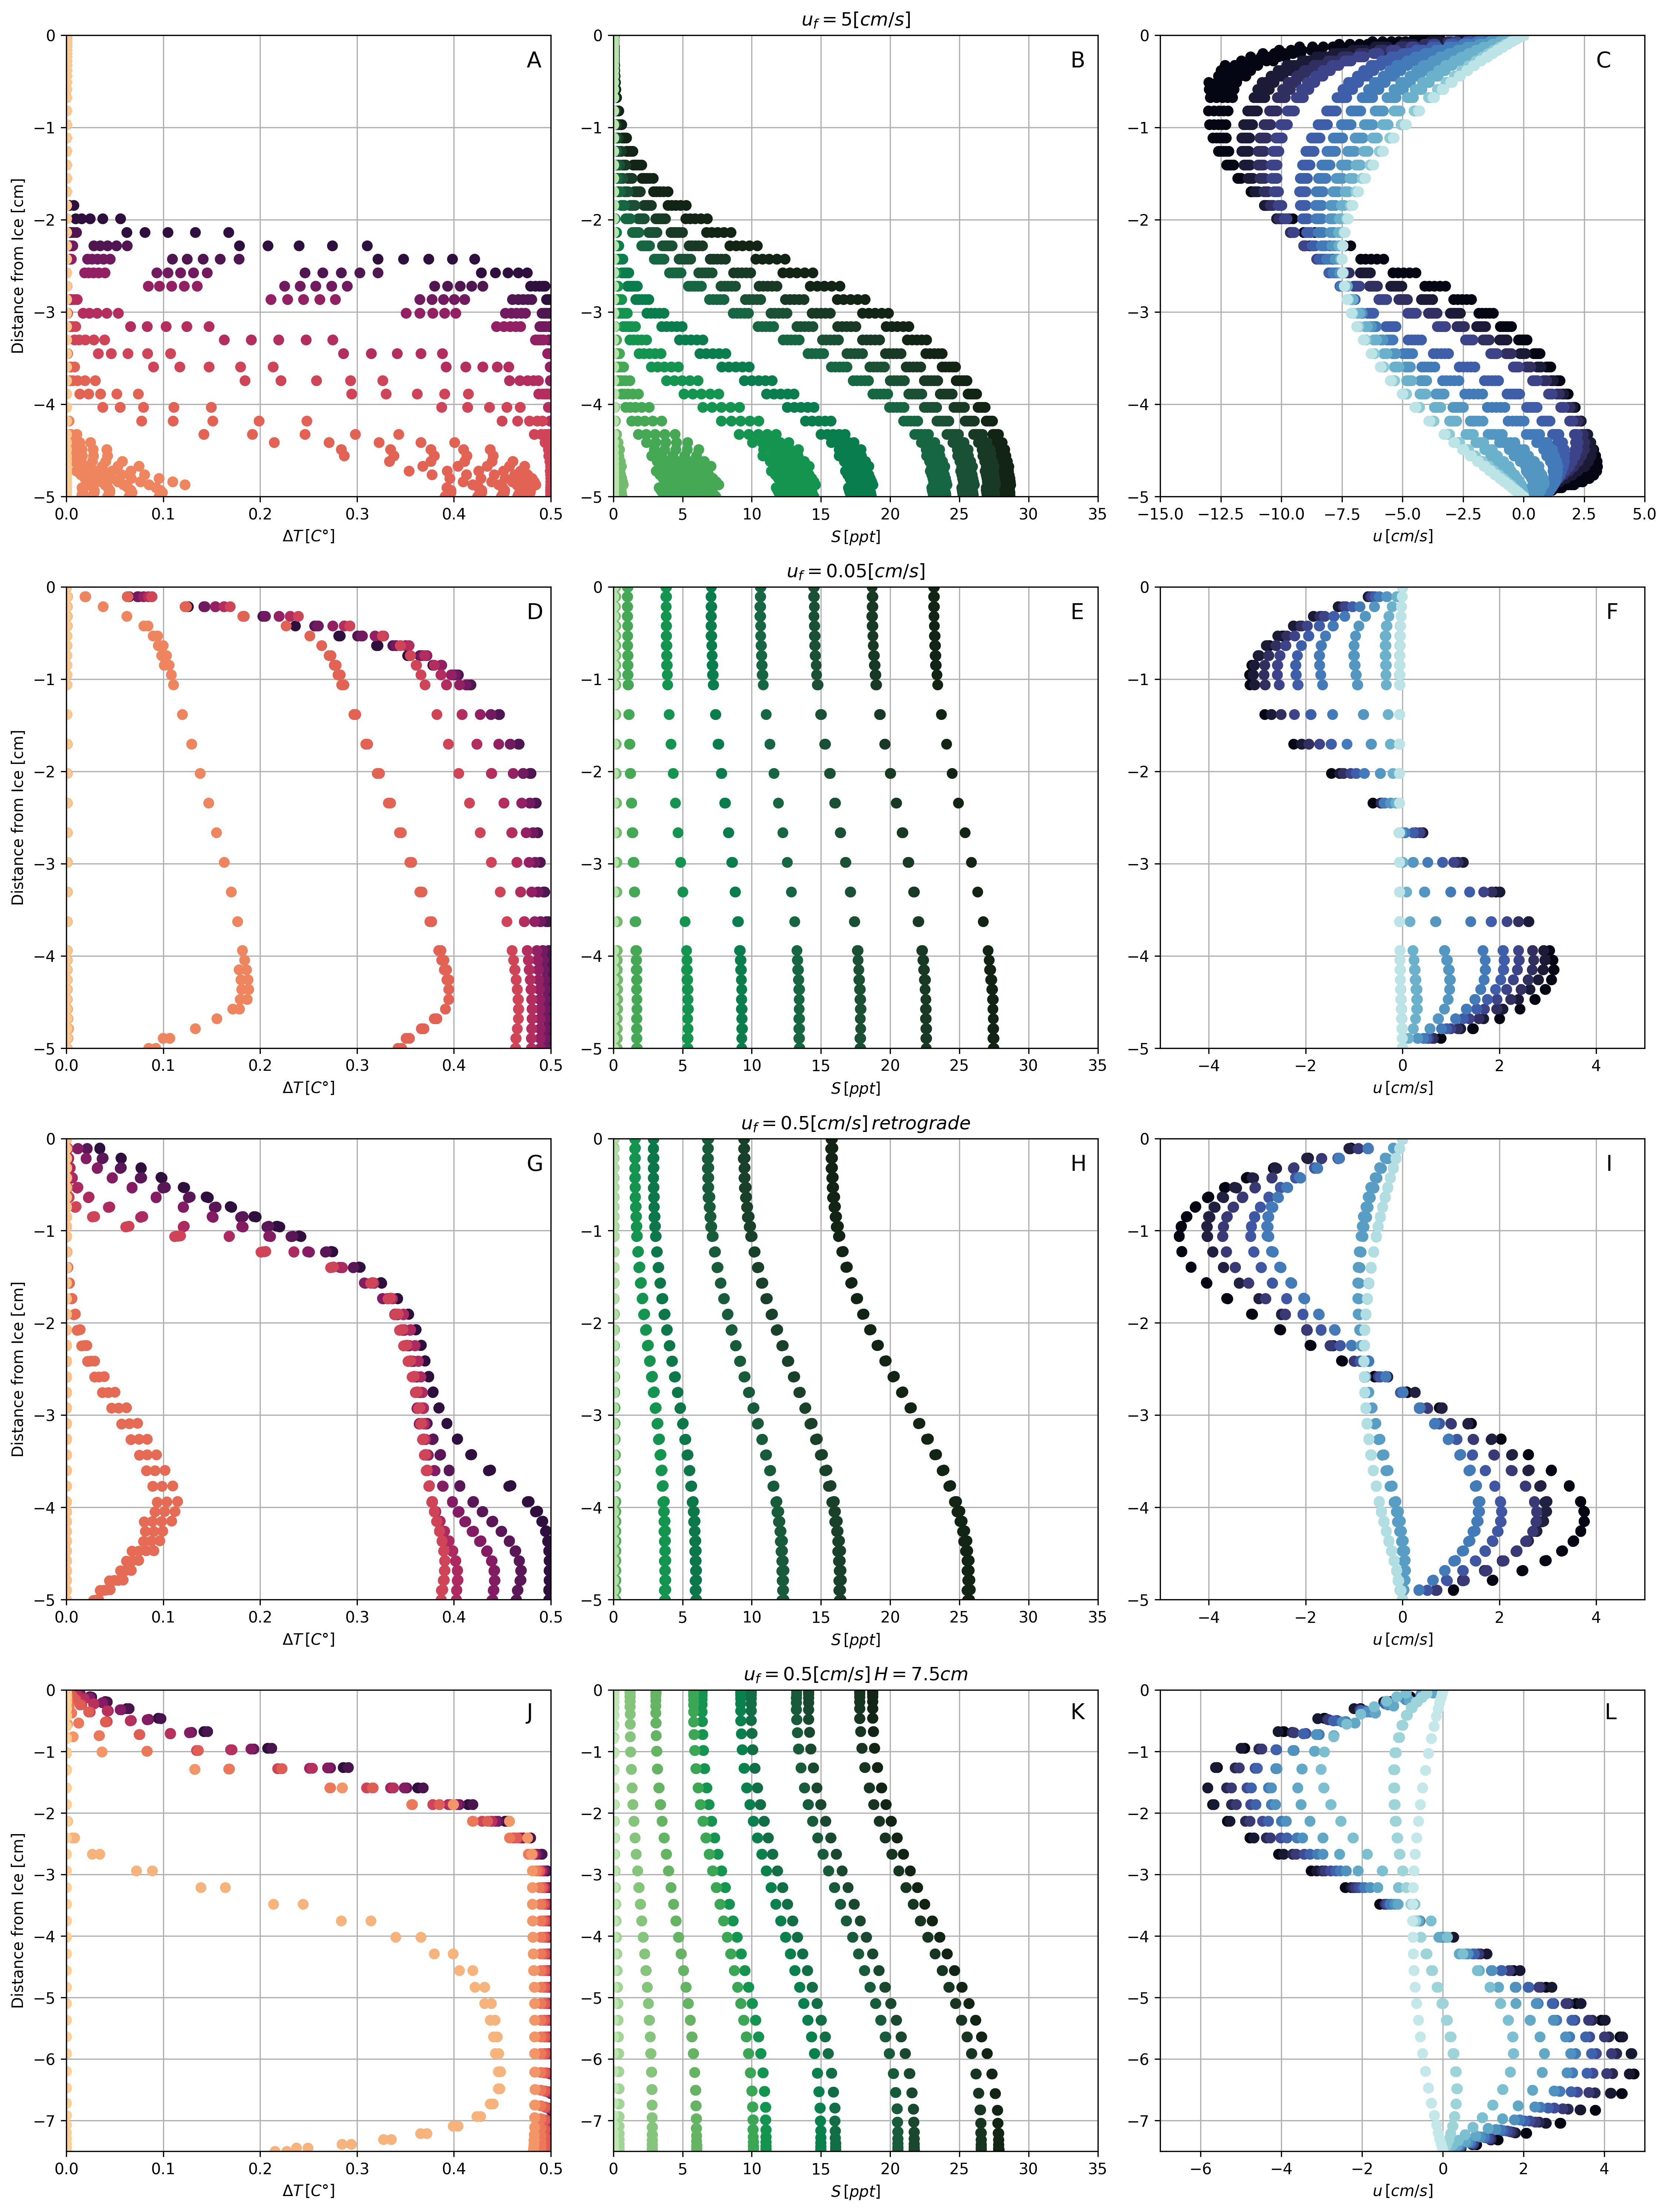

In [8]:
fig, ax = plt.subplots(4,3, figsize = (15,20), dpi = 300)
noMelt = [noMelt_f1, noMelt_f3, noMelt_f4, noMelt_f5]
locs_all = [locs_f1, locs_f3, locs_f4, locs_f5]
for j in range(0,4):
    ys = noMelt[j][0,:,:]
    n = len(ys[0,:])
    cT = cmo.cm.matter_r(np.linspace(0,1,n+1))
    cS = cmo.cm.algae_r(np.linspace(0,1,n+1))
    cU = cmo.cm.ice(np.linspace(0,1,n+1))
    Ts = noMelt[j][2,:,:]
    Ss = noMelt[j][3,:,:]
    us = noMelt[j][1,:,:]
    locs = locs_all[j]
    

    for i in range(0,n):
        if j == 2:
            ax[j,0].scatter(Ts[:,i] - 273.15, 100*(ys[:,i]-np.nanmax(ys[:,i])), color=cT[i], zorder = 2)
            ax[j,1].scatter(Ss[:,i] * 1000, 100*(ys[:,i]-np.nanmax(ys[:,i])), color=cS[i], zorder = 2)
            ax[j,2].scatter(us[:,i] * 100,100* (ys[:,i]-np.nanmax(ys[:,i])), color=cU[i], zorder = 2)
        elif j == 3:
            ax[j,0].scatter(Ts[:,i] - 273.15, 100*(ys[:,i]-0.075), color=cT[i], zorder = 2)
            ax[j,1].scatter(Ss[:,i] * 1000, 100*(ys[:,i]-0.075), color=cS[i], zorder = 2)
            ax[j,2].scatter(us[:,i] * 100,100* (ys[:,i]-0.075), color=cU[i], zorder = 2)
        else: #if j!= 2 and j!=3:
            ax[j,0].scatter(Ts[:,i] - 273.15, 100*(ys[:,i]-0.05), color=cT[i], zorder = 2)
            ax[j,1].scatter(Ss[:,i] * 1000, 100*(ys[:,i]-0.05), color=cS[i], zorder = 2)
            ax[j,2].scatter(us[:,i] * 100,100* (ys[:,i]-0.05), color=cU[i], zorder = 2)
    
    ax[j,0].grid(); ax[j,1].grid(); ax[j,2].grid();
    ax[j,0].set_xlim(0,0.5); ax[j,1].set_xlim(0,35); ax[j,2].set_xlim(-5,5);
    ax[j,0].set_ylim(-5,0); ax[j,1].set_ylim(-5,0); ax[j,2].set_ylim(-5,0);
    ax[j,0].set_xlabel('$\Delta T \, [C\degree]$')
    ax[j,1].set_xlabel('$ S \, [ppt]$')
    ax[j,2].set_xlabel('$u \, [cm/s]$');
    #ax[1,0].legend(locs, title = 'm beyond G.L.'); ax[1,1].legend(locs, title = 'm beyond G.L.'); ax[1,2].legend(locs, title = 'm beyond G.L.') 
    ax[j,0].set_ylabel('Distance from Ice [cm]'); 
ax[0,1].set_title('$u_f = 5 [cm/s]$', fontsize = 12)
ax[1,1].set_title('$u_f = 0.05 [cm/s]$', fontsize = 12)
ax[2,1].set_title('$u_f = 0.5 [cm/s] \, retrograde$', fontsize = 12)
ax[3,1].set_title('$u_f = 0.5 [cm/s] \, H = 7.5 cm$', fontsize = 12)

plt.tight_layout()
ax[3,0].set_ylim(-7.5,0); ax[3,1].set_ylim(-7.5,0); ax[3,2].set_ylim(-7.5,0);
ax[0,2].set_xlim(-15,5); ax[3,2].set_xlim(-7,5);

ax[0,0].text(0.475,-0.35,'A',fontsize = 14);
ax[0,1].text(33,-0.35,'B',fontsize = 14);
ax[0,2].text(3,-0.35,'C',fontsize = 14);

ax[1,0].text(0.475,-0.35,'D',fontsize = 14);
ax[1,1].text(33,-0.35,'E',fontsize = 14);
ax[1,2].text(4.2,-0.35,'F',fontsize = 14);

ax[2,0].text(0.475,-0.35,'G',fontsize = 14);
ax[2,1].text(33,-0.35,'H',fontsize = 14);
ax[2,2].text(4.2,-0.35,'I',fontsize = 14);

ax[3,0].text(0.475,-0.475,'J',fontsize = 14);
ax[3,1].text(33,-0.475,'K',fontsize = 14);
ax[3,2].text(4,-0.475,'L',fontsize = 14);

plt.savefig('all_TSU_profs.png', dpi = 500);

## Plotting melt-enabled for the sloped and thicker subglacial spaces

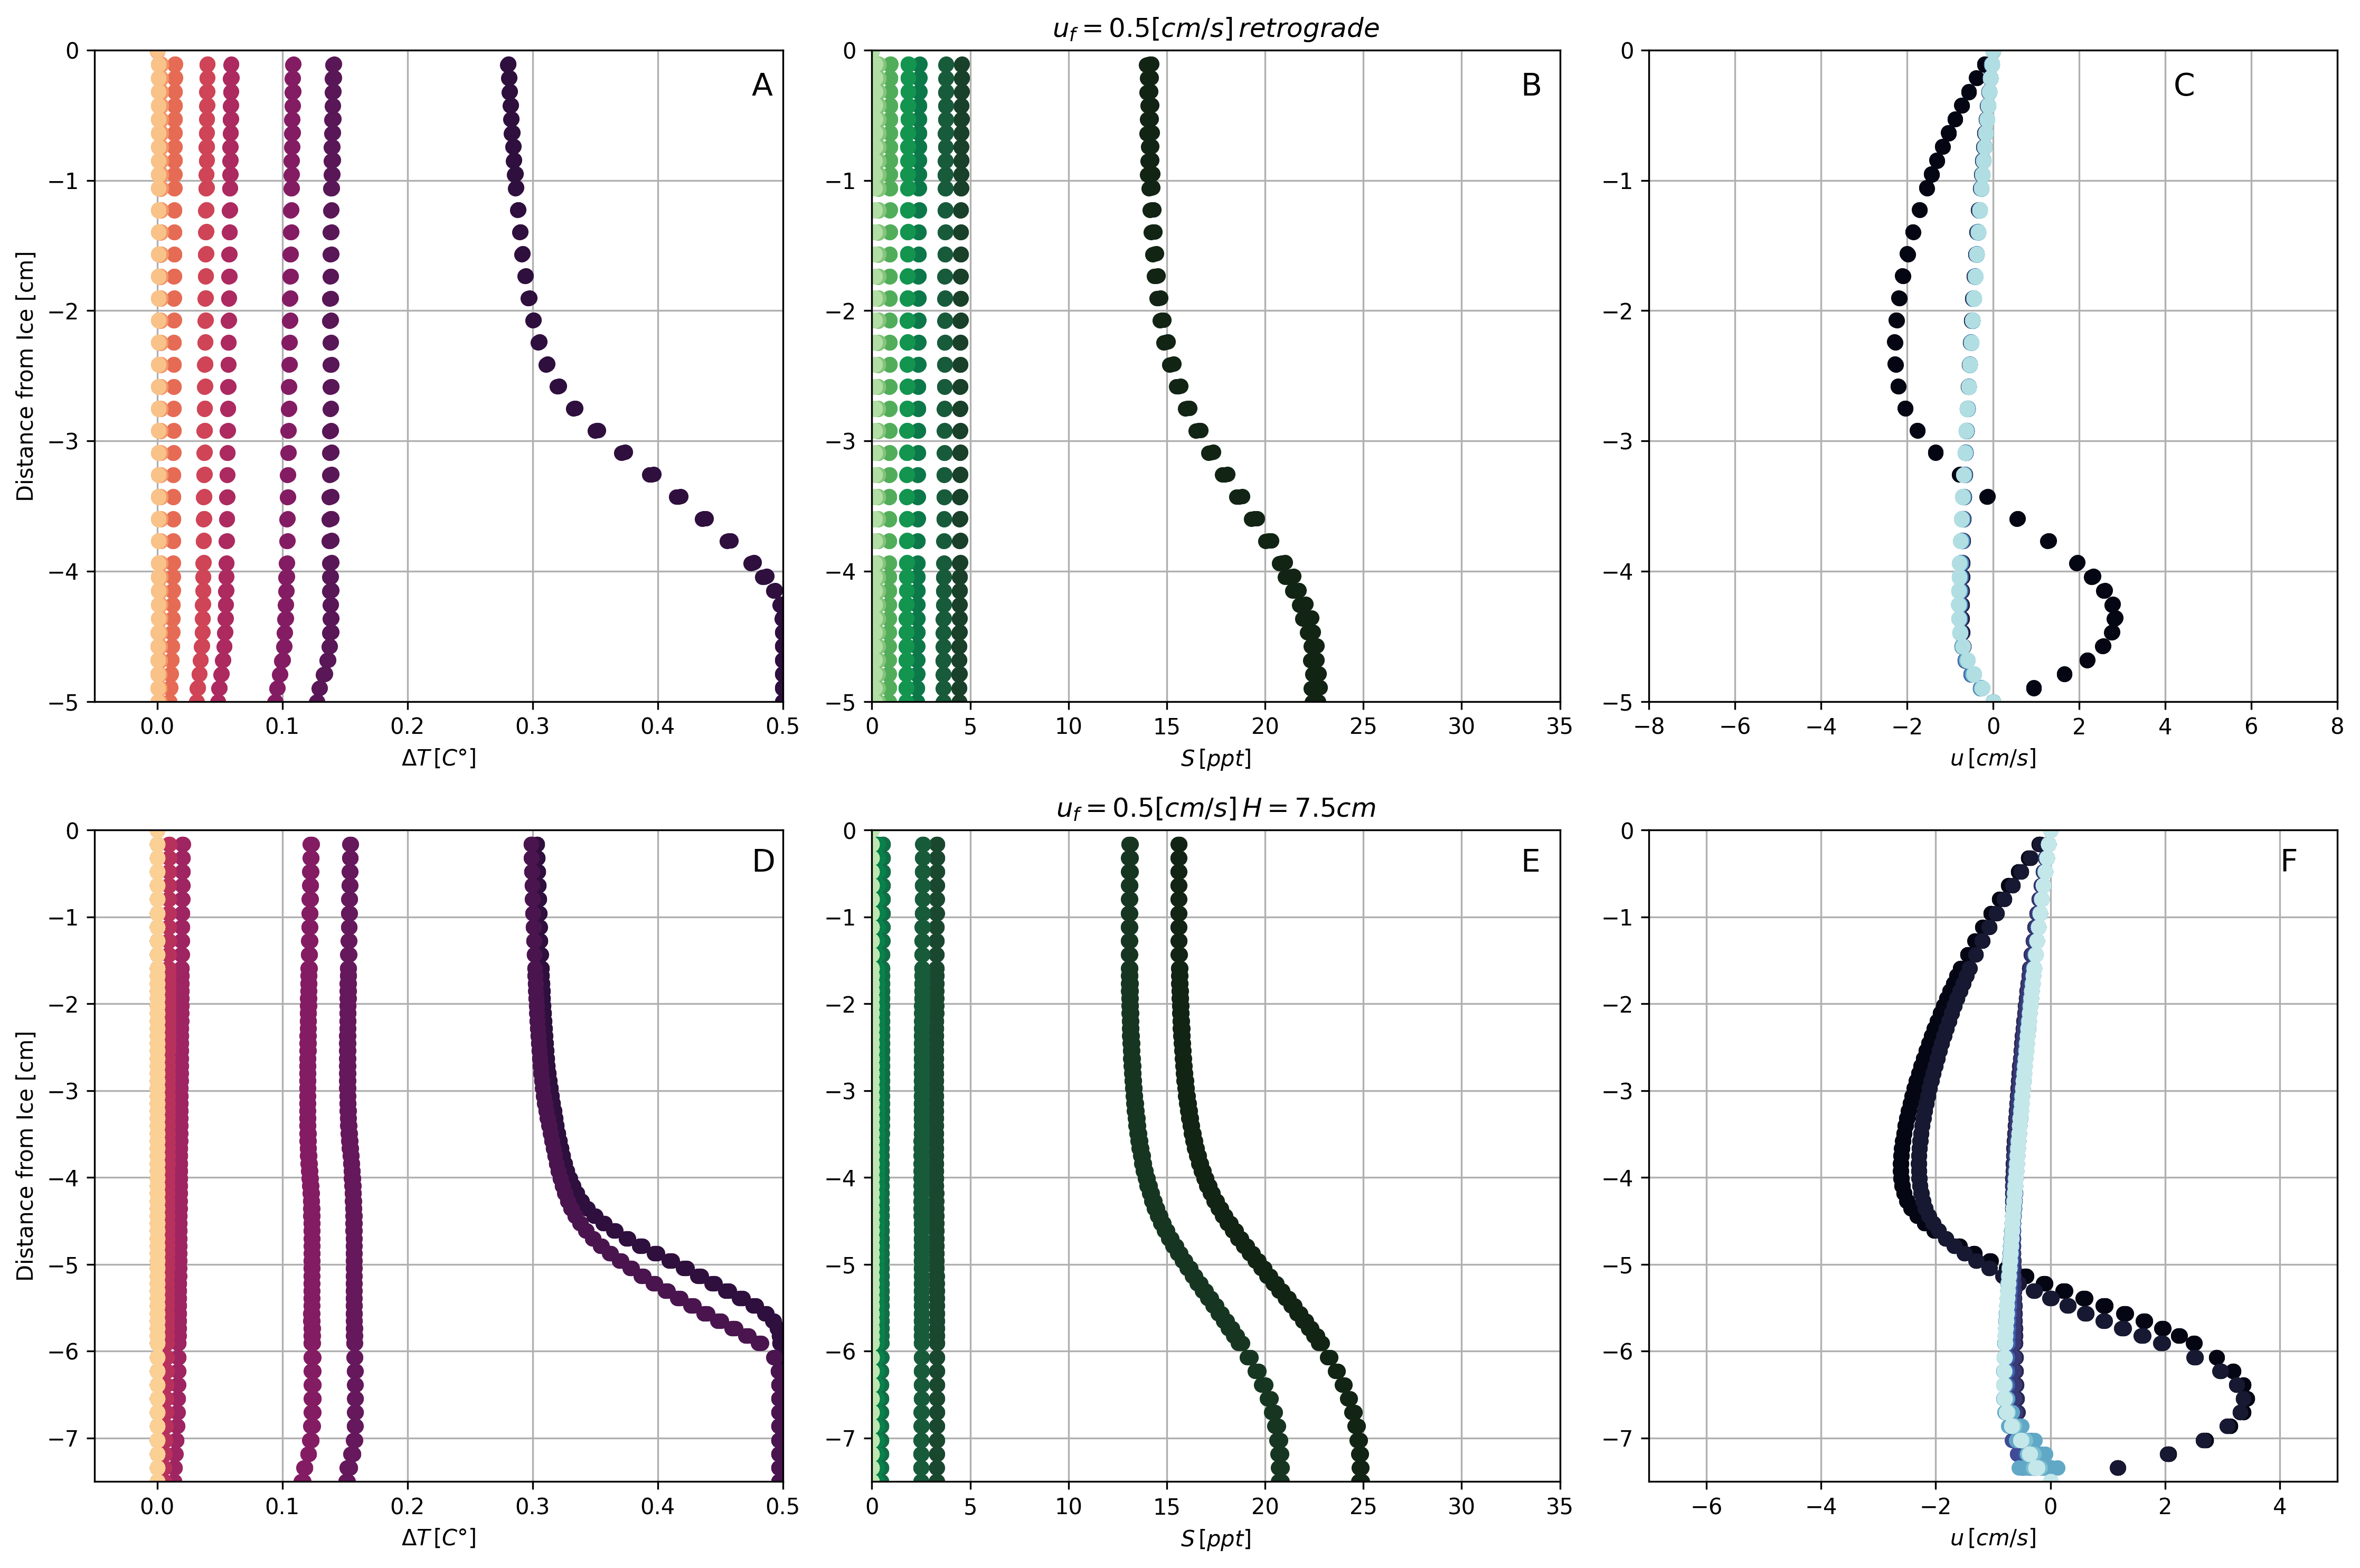

In [13]:
fig, ax = plt.subplots(2,3, figsize = (15,10), dpi = 300)
noMelt = [meltEnabled_f4, meltEnabled_f5]
locs_all = [locs_f1, locs_f3, locs_f4, locs_f5]
for j in range(0,2):
    ys = noMelt[j][0,:,:]
    n = len(ys[0,:])
    cT = cmo.cm.matter_r(np.linspace(0,1,n+1))
    cS = cmo.cm.algae_r(np.linspace(0,1,n+1))
    cU = cmo.cm.ice(np.linspace(0,1,n+1))
    Ts = noMelt[j][2,:,:]
    Ss = noMelt[j][3,:,:]
    us = noMelt[j][1,:,:]
    locs = locs_all[j]
    for i in range(0,n):
        if j == 0:
            ax[j,0].scatter(Ts[:,i] - 273.15, 100*(ys[:,i]-np.nanmax(ys[:,i])), color=cT[i], zorder = 2)
            ax[j,1].scatter(Ss[:,i] * 1000, 100*(ys[:,i]-np.nanmax(ys[:,i])), color=cS[i], zorder = 2)
            ax[j,2].scatter(us[:,i] * 100,100* (ys[:,i]-np.nanmax(ys[:,i])), color=cU[i], zorder = 2)
        elif j == 1:
            ax[j,0].scatter(Ts[:,i] - 273.15, 100*(ys[:,i]-0.075), color=cT[i], zorder = 2)
            ax[j,1].scatter(Ss[:,i] * 1000, 100*(ys[:,i]-0.075), color=cS[i], zorder = 2)
            ax[j,2].scatter(us[:,i] * 100,100* (ys[:,i]-0.075), color=cU[i], zorder = 2)
    ax[j,0].grid(); ax[j,1].grid(); ax[j,2].grid();
    ax[j,0].set_xlim(-0.05,0.5); ax[j,1].set_xlim(0,35); ax[j,2].set_xlim(-8,8);
    ax[j,0].set_ylim(-5,0); ax[j,1].set_ylim(-5,0); ax[j,2].set_ylim(-5,0);
    ax[j,0].set_xlabel('$\Delta T \, [C\degree]$')
    ax[j,1].set_xlabel('$ S \, [ppt]$')
    ax[j,2].set_xlabel('$u \, [cm/s]$');
    #ax[1,0].legend(locs, title = 'm beyond G.L.'); ax[1,1].legend(locs, title = 'm beyond G.L.'); ax[1,2].legend(locs, title = 'm beyond G.L.')

    ax[j,0].set_ylabel('Distance from Ice [cm]'); 

ax[1,0].set_ylim(-7.5,0); ax[1,1].set_ylim(-7.5,0); ax[1,2].set_ylim(-7.5,0);

ax[0,1].set_title('$u_f = 0.5 [cm/s] \, retrograde$', fontsize = 12)
ax[1,1].set_title('$u_f = 0.5 [cm/s] \, H = 7.5 cm$', fontsize = 12)

plt.tight_layout()
ax[1,0].set_ylim(-7.5,0); ax[1,1].set_ylim(-7.5,0); ax[1,2].set_ylim(-7.5,0);
ax[1,2].set_xlim(-7,5);

ax[0,0].text(0.475,-0.35,'A',fontsize = 14);
ax[0,1].text(33,-0.35,'B',fontsize = 14);
ax[0,2].text(4.2,-0.35,'C',fontsize = 14);

ax[1,0].text(0.475,-0.475,'D',fontsize = 14);
ax[1,1].text(33,-0.475,'E',fontsize = 14);
ax[1,2].text(4,-0.475,'F',fontsize = 14);

## Plotting law of the wall appended figure for varying freshwater velocities

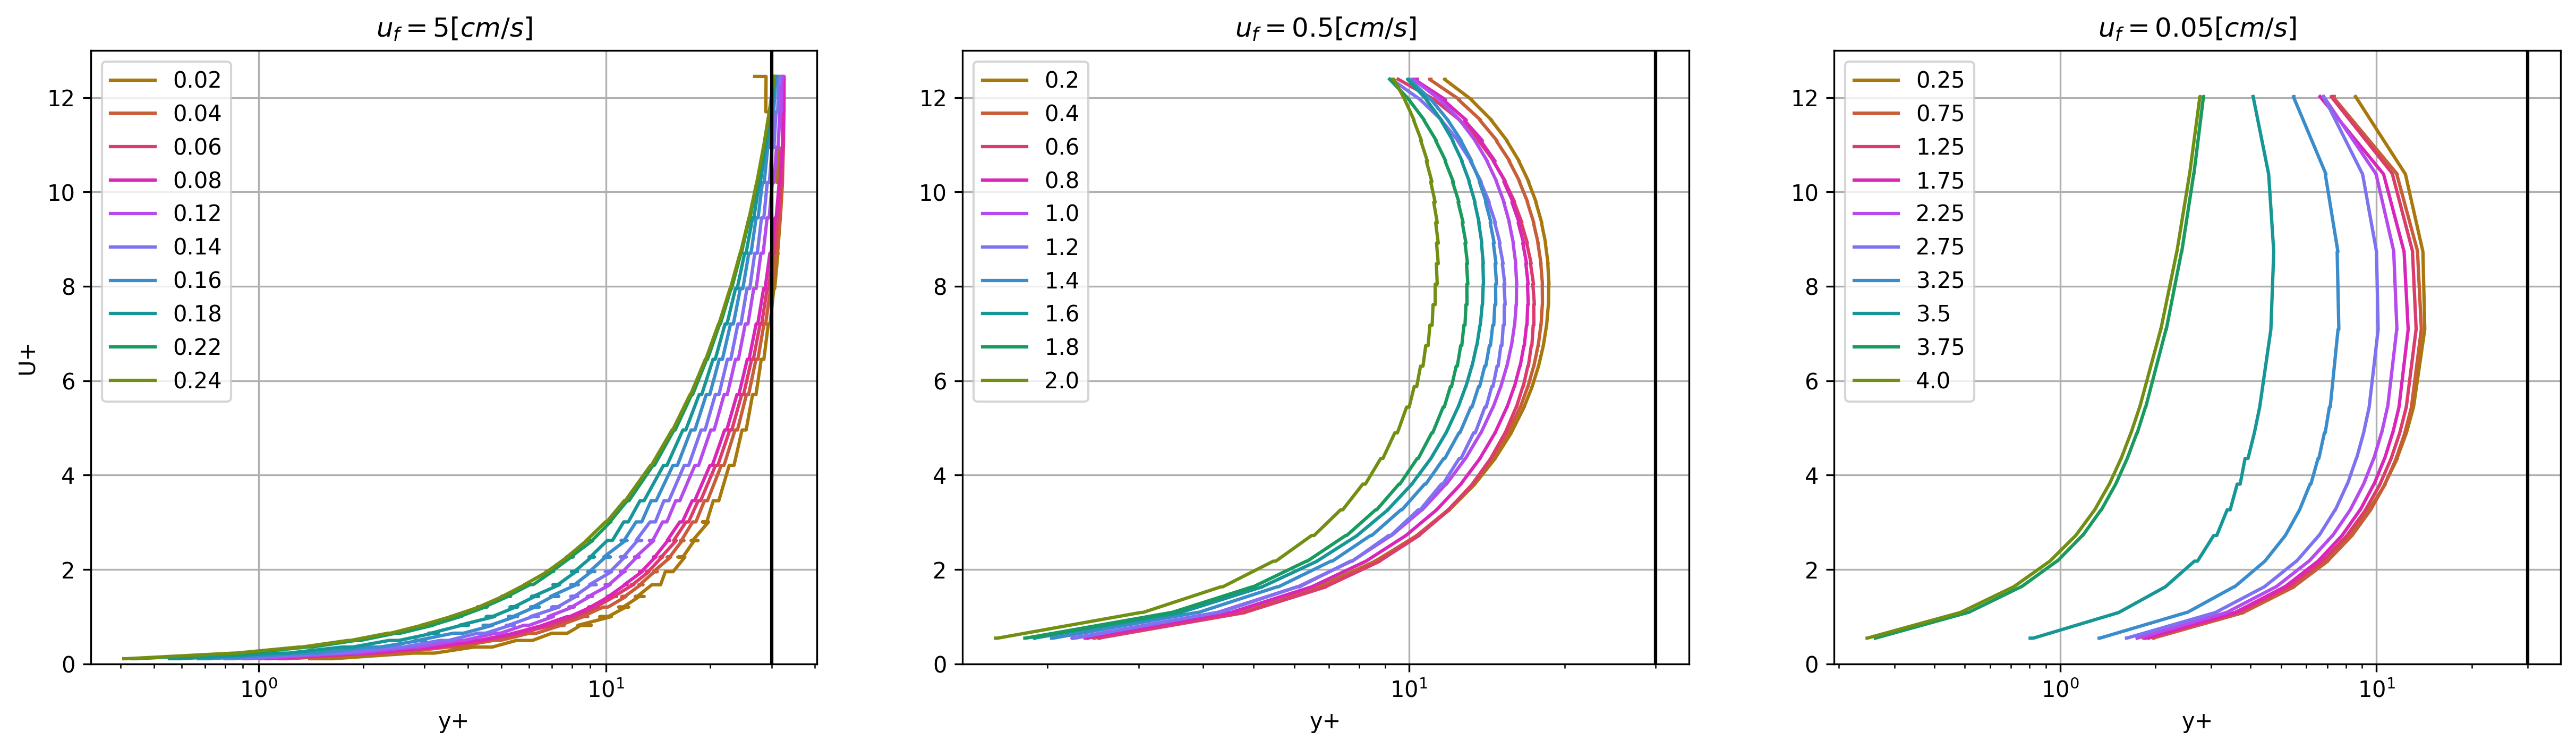

In [9]:
locs = np.subtract(locs_f2,2).round(2)
locs_all = [np.subtract(locs_f1,2).round(2),np.subtract(locs_f2,2).round(2),np.subtract(locs_f3,2).round(2)]
fig, ax = plt.subplots(1,3,figsize = (20,5), dpi = 300)
noMelt = [noMelt_f1, noMelt_f2, noMelt_f3]
for j in range(0,3):
    n = len(noMelt[j][0,0,:])
    cT = cmo.cm.phase(np.linspace(0,1,n+1))
    for i in range(0,n):
        # ushear, all y's, at loc[0]
        ys = abs(0.05 - noMelt[j][0,:,i]) #absolute distance from the ice
        ushear = noMelt[j][4,:,i]
        u = abs(noMelt[j][1,:,i])

        idx = np.where(ys <= 0.025) # everything within half of the domain. 0.0125 for witin half upper layer
        ys = ys[idx]
        ushear = ushear[idx]
        u = u[idx]

        rho = 1000
        shearStress = ushear**2 * rho
        uplus = u / shearStress
        nu = 1.95 * 10 **(-6)
        yplus = ys * ushear / nu
        ax[j].plot(yplus, uplus, color = cT[i])
    ax[j].legend(locs_all[j])
    ax[j].set_xscale('log')
    ax[j].set_ylim(0,13);
    ax[j].grid()
    ax[j].set_xlabel('y+');
    ax[j].plot(np.ones(10) * 30, np.linspace(0,13,10), color = 'black')

ax[0].set_ylabel('U+');

ax[0].set_title('$u_f = 5 [cm/s]$'); ax[1].set_title('$u_f = 0.5 [cm/s]$'); 
ax[2].set_title('$u_f = 0.05 [cm/s]$');

plt.savefig('lawOfwall_normies.png', dpi = 500);

## Plotting Law of the Wall for retrograde and thicker subglacial spaces

/var/folders/z2/cy5n8j017z34kdvp0xbq27bh02w58x/T/ipykernel_22991/4228928337.py:23: RuntimeWarning: invalid value encountered in divide
  uplus = u / shearStress


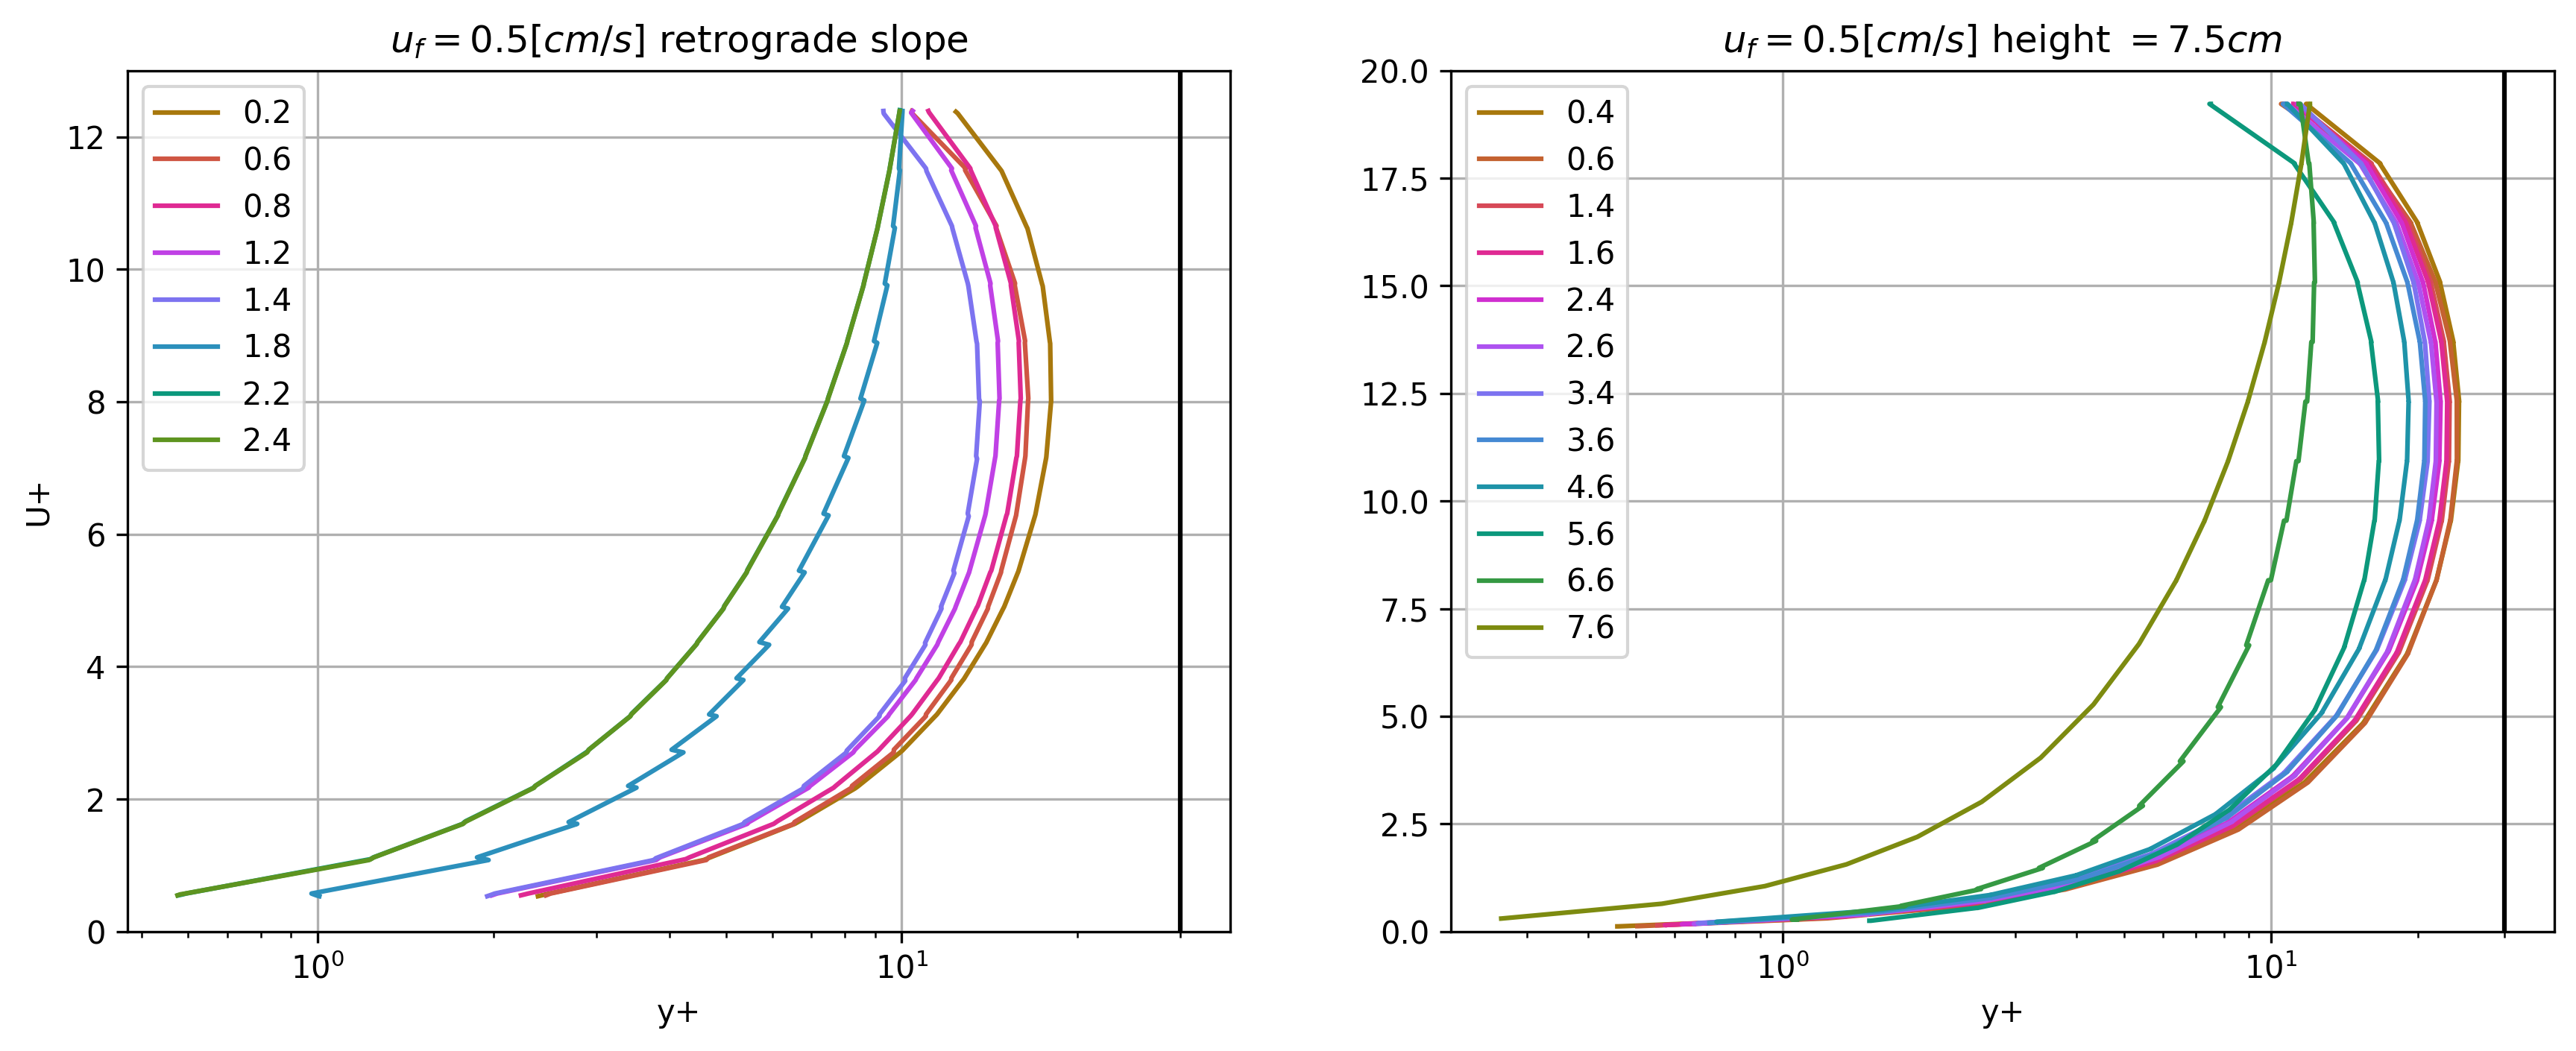

In [26]:
locs = np.subtract(locs_f2,2).round(2)

fig, ax = plt.subplots(1,2,figsize = (14,5), dpi = 300)
noMelt = [noMelt_f4, noMelt_f5]
locs_all = [np.subtract(locs_f4,2).round(2),np.subtract(locs_f5,2).round(2)]

j = 0
n = len(noMelt[j][0,0,:])
cT = cmo.cm.phase(np.linspace(0,1,n+1))
for i in range(0,n):
    # ushear, all y's, at loc[0]
    ys = abs(np.nanmax(noMelt[j][0,:,i]) - noMelt[j][0,:,i]) #absolute distance from the ice
    ushear = noMelt[j][4,:,i]
    u = abs(noMelt[j][1,:,i])

    idx = np.where(ys <= 0.025) # everything within half of the domain. 0.0125 for witin half upper layer
    ys = ys[idx]
    ushear = ushear[idx]
    u = u[idx]

    rho = 1000
    shearStress = ushear**2 * rho
    uplus = u / shearStress
    nu = 1.95 * 10 **(-6)
    yplus = ys * ushear / nu
    ax[j].plot(yplus, uplus, color = cT[i])
    
ax[j].legend(locs_all[j])
ax[j].set_xscale('log')
ax[j].set_ylim(0,13);
ax[j].grid()
ax[j].set_xlabel('y+'); 
ax[j].plot(np.ones(10) * 30, np.linspace(0,13,10), color = 'black')

j = 1
n = len(noMelt[j][0,0,:])
cT = cmo.cm.phase(np.linspace(0,1,n+1))

for i in range(0,n):
    # ushear, all y's, at loc[0]
    ys = abs(0.075 - noMelt[j][0,:,i]) #absolute distance from the ice
    ushear = noMelt[j][4,:,i]
    u = abs(noMelt[j][1,:,i])

    idx = np.where(ys <= 0.0375) # everything within half of the domain. 0.0125 for witin half upper layer
    ys = ys[idx]
    ushear = ushear[idx]
    u = u[idx]

    rho = 1000
    shearStress = ushear**2 * rho
    uplus = u / shearStress
    nu = 1.95 * 10 **(-6)
    yplus = ys * ushear / nu
    ax[j].plot(yplus, uplus, color = cT[i])
    
ax[j].legend(locs_all[j])
ax[j].set_xscale('log')
ax[j].set_ylim(0,20);
ax[j].grid()
ax[j].set_xlabel('y+'); 
ax[j].plot(np.ones(10) * 30, np.linspace(0,20,10), color = 'black')

ax[0].set_ylabel('U+');

ax[0].set_title('$u_f = 0.5 [cm/s]$ retrograde slope');
ax[1].set_title('$u_f = 0.5 [cm/s]$ height $=7.5 cm$');

plt.savefig('lawOfwall_otherGeoms.png',dpi = 500);